In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Load the Data
kaffee_reviews = pd.read_csv('kaffee_reviews.csv', usecols=['rating', 'review'])
kaffee_reviews

,rating,review
0,5,Wenn ich Bohnenkaffee trinke (auf Arbeit trink...
1,5,Für mich ist dieser Kaffee ideal. Die Grundvor...
2,5,Ich persönlich bin insbesondere von dem Geschm...
3,5,ganz abgesehen vom geschmack legt gepa inzwisc...
4,5,Seit Jahren kaufe ich am liebsten den Kaffee u...
...,...,...
459,5,"Ich bevorzuge Gepa Kaffee, da er FairTrade pro..."
460,5,Kaffee genießen mit gutem Gefühl: besonders zu...
461,5,"Ich habe einen magenfreundlichen, aber koffein..."
462,5,Bei Gepa unterstützt man bei jedem Kauf ein we...


In [3]:
#display the last 50 reviews
kaffee_reviews.tail(50)

,rating,review
414,5,"Fair, bio und schmeckt gut! Und der Preis ist ..."
415,5,"Der Geschmack ist einmalig, es kommt das Rösta..."
416,5,"sehr leckerer kaffee in ganzen Bohnen ,dieser ..."
417,5,Der J.J. Sarboven Cafe intencion schmeckt uns ...
418,5,Der Kaffee schmeckt ausgewogen. Er hat wenig S...
419,5,Fairtrade Kaffee ist oft eine Herausforderung ...
420,5,da wir fleißige Kaffeetrinker sind haben wir s...
421,5,"Kaffee zu lange geröstet, hohe Acrylamidwerte,..."
422,5,"Kaufe nur noch Fair Trade Kaffee, von den unte..."
423,5,Ich habe die ganze EspressoBohne getestet und ...


In [4]:
import csv

In [5]:
with open('kaffee_reviews.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # skip header row
    for row in reader:
        rating = float(row[0])
        if rating >= 4:
            review = 'positive'
        elif rating <= 2:
            review = 'negative'
        else:
            review = 'neutral'
        # do something with the review variable here


In [6]:
#showing positive reviews
positive_reviews = kaffee_reviews[kaffee_reviews['rating']>=4]
positive_reviews

,rating,review
0,5,Wenn ich Bohnenkaffee trinke (auf Arbeit trink...
1,5,Für mich ist dieser Kaffee ideal. Die Grundvor...
2,5,Ich persönlich bin insbesondere von dem Geschm...
3,5,ganz abgesehen vom geschmack legt gepa inzwisc...
4,5,Seit Jahren kaufe ich am liebsten den Kaffee u...
...,...,...
459,5,"Ich bevorzuge Gepa Kaffee, da er FairTrade pro..."
460,5,Kaffee genießen mit gutem Gefühl: besonders zu...
461,5,"Ich habe einen magenfreundlichen, aber koffein..."
462,5,Bei Gepa unterstützt man bei jedem Kauf ein we...


In [7]:
#convert to list format
kaffee_reviews_to_list = positive_reviews['review'].tolist()
len(kaffee_reviews_to_list)


433

In [8]:
kaffee_reviews_as_one_string = ''.join(kaffee_reviews_to_list)
kaffee_reviews_as_one_string

'Wenn ich Bohnenkaffee trinke (auf Arbeit trinke ich wegen der Kapselmaschine nur Kaffee aus Granulat), dann in jedem Fall GEPA-Kaffee. Schon in Studium und mit Bafög war es mit der höhere Preis (verglichen mit den herkömmlichen Kaffees) immer Wert, GEPA zu kaufen. Zum einen, weil ich ihn mit gutem Gewissen trinken kann, da er aus fairem Handel stammt und seine Herstellung nicht auf Ausbeutung basiert. Zum anderen, weil er auch bei Blindverkostungen immer deutlich besser schmeckt, als andere Kaffeesorten. Am liebsten trinke ich stärkeren Kaffee (z.B. „Kolumbien Pur“), aber auch die milderen Sorten hatte ich schon und war mit dem Geschmack sehr zufrieden. Mein Partner kauft seit wir uns kennen auch nur noch GEPA-Kaffees, da ich ihn überzeugen konnte.Für mich ist dieser Kaffee ideal. Die Grundvoraussetzungen Bio und Fair trade sind bei GEPA immer gegeben. Aber hier überzeugt auch das milde feine Aroma mit diesem besonderen Kick der Kakaonote. Der Guatemala Pur ist sehr bekömmlich. Gerade

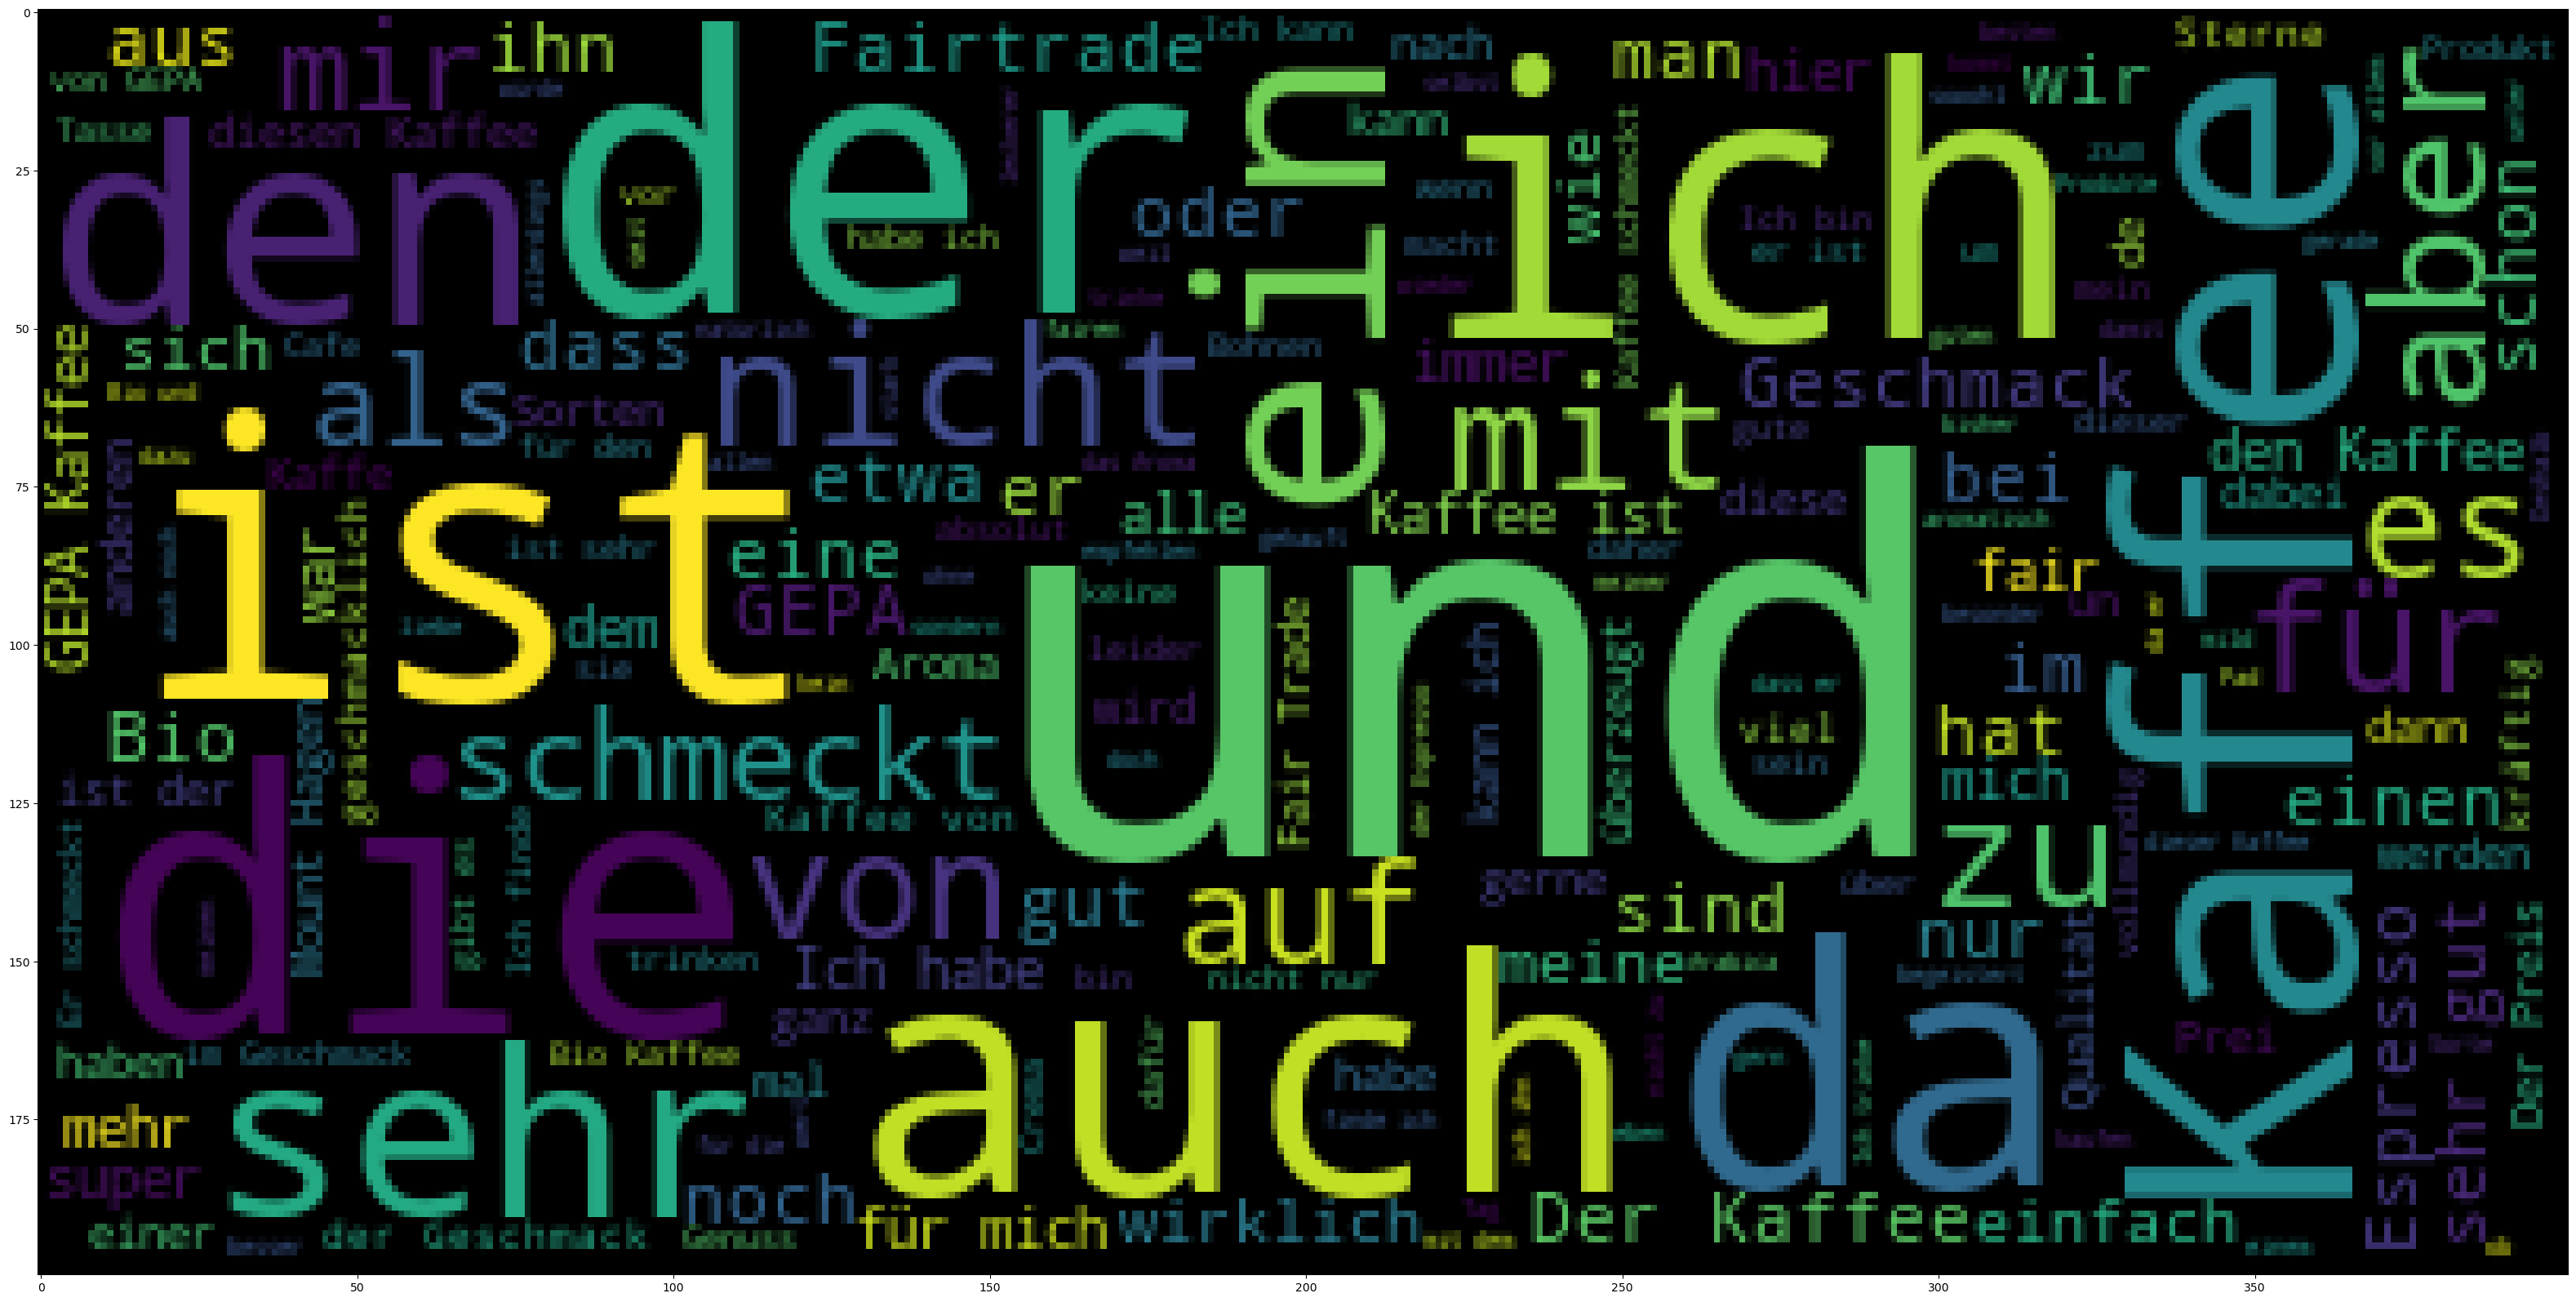

In [9]:
#plotting word cloud for positive reviews
from wordcloud import WordCloud

plt.figure(figsize=(40,40))
plt.imshow(WordCloud().generate(kaffee_reviews_as_one_string))

In [10]:
#showing negative reviews
negative_reviews = kaffee_reviews[kaffee_reviews['rating']<=2]
negative_reviews

,rating,review
28,1,"Da es unsere Sorte grad nicht gab, haben wir d..."
29,1,"Dafür, dass der Kaffee laut Fernsehwerbung ext..."
36,1,Ich nutze von REWE Bio Röstkaffee Fairtrade di...
37,1,Naturland von Rewe
38,1,"Naturland gibt auf ihrer Internetseite an, das..."
42,1,Fairtrade Logo = Armut light &amp; keine Trans...
43,1,Kaffeebörse in Nairobi: Für Fairtrade Kaffee g...
44,1,siehe dazu in Zeit-Online Fairtrade: Wenn Kaff...
56,1,geschmacklich: 3 Sterne optisch: 3 Sterne Prei...
57,1,Nahezu ungenießbar – gibt es bei Rewe eine Qua...


In [11]:
#showing neutral reviews
neutral_reviews= kaffee_reviews[kaffee_reviews['rating'] == 3]
neutral_reviews

,rating,review
40,3,Hatten die Bohnen im Blindtest im Büro im Voll...
49,3,"Wir sind mit dem Kaffee sehr zufrieden, wir ma..."
50,3,"Eigentlich schmeckt dieser Kaffee, wie man es ..."
51,3,Der Kaffee ist geschmacklich was für alle: nic...
60,3,Der Kaffee schmeckt auf jeden Fall sehr gut un...
61,3,Der Kaffee der ALDI Rösterei war schon immer g...
62,3,"4 Sterne gibt es deshalb, weil es nicht mein L..."
70,3,"Ich finde ihn sehr lecker , kräftig im Geschma..."


<AxesSubplot:xlabel='rating', ylabel='count'>

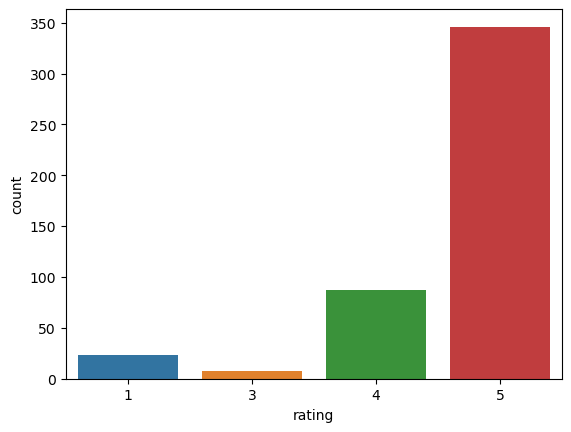

In [12]:
#plotting the count plot for the ratings
sns.countplot(x = kaffee_reviews['rating'])

In [13]:
#feature extraction: Length of the review text
kaffee_reviews['length']=kaffee_reviews['review'].apply(len)
kaffee_reviews

,rating,review,length
0,5,Wenn ich Bohnenkaffee trinke (auf Arbeit trink...,758
1,5,Für mich ist dieser Kaffee ideal. Die Grundvor...,522
2,5,Ich persönlich bin insbesondere von dem Geschm...,472
3,5,ganz abgesehen vom geschmack legt gepa inzwisc...,344
4,5,Seit Jahren kaufe ich am liebsten den Kaffee u...,308
...,...,...,...
459,5,"Ich bevorzuge Gepa Kaffee, da er FairTrade pro...",326
460,5,Kaffee genießen mit gutem Gefühl: besonders zu...,273
461,5,"Ich habe einen magenfreundlichen, aber koffein...",174
462,5,Bei Gepa unterstützt man bei jedem Kauf ein we...,114


In [14]:
kaffee_reviews.describe()

,rating,length
count,464.000000,464.000000
mean,4.579741,271.137931
std,0.935327,183.949584
min,1.000000,4.000000
25%,4.000000,131.500000
50%,5.000000,252.500000
75%,5.000000,372.000000
max,5.000000,1222.000000


In [15]:
#longest review
kaffee_reviews[kaffee_reviews['length'] == 1222.000000]

,rating,review,length
9,5,Aufgrund langfristiger Medikamenteneinnahme wu...,1222


In [16]:
#shortest review
kaffee_reviews[kaffee_reviews['length'] == 4.000000]

,rating,review,length
89,4,toll,4
211,5,toll,4


<AxesSubplot:ylabel='Frequency'>

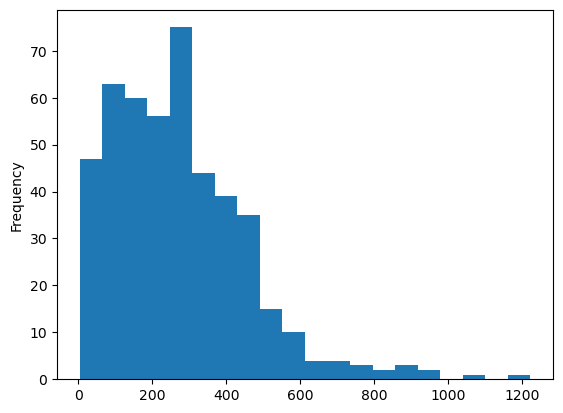

In [17]:
#plot the length histogram
kaffee_reviews['length'].plot(bins = 20, kind = 'hist')

In [18]:
import re
from nltk.corpus import stopwords


In [19]:
def clean_review(review):
    #remove punctuations and set to lowercase
    review_text = review.lower()
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    #remove stopwords
    stop_words = set(stopwords.words("german"))
    words = word_tokenize(review_text)
    words = [word for word in words if not word in stop_words]
    
    #lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    
    #join the cleaned words back into a sentence
    cleaned_review = " ".join(words)
    return cleaned_review


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
#Tokenization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(kaffee_reviews['review'])
y = kaffee_reviews['rating']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#Training and testing
#test size representation percentage
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(324, 3197)
(324,)
(140, 3197)
(140,)


In [24]:
#Training the model using Naives Bayes algorithm 
from sklearn.naive_bayes import MultinomialNB

naive_model = MultinomialNB()
naive_model.fit(X_train, y_train)

MultinomialNB()

In [25]:
!pip install --upgrade scikit-learn

In [26]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, zero_division=
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
# Evaluate nb_model performance
y_pred = naive_model.predict(X_test)

accuracy_level = accuracy_score(y_test, y_pred)*100
precision_level = precision_score(y_test, y_pred, average='weighted')*100
recall_score_level= recall_score(y_test, y_pred, average='weighted')*100
f1_score_level = f1_score(y_test, y_pred, average='weighted')*100

print('Accuracy:', accuracy_level)
print('Precision:', precision_level)
print('Recall Score:', recall_score_level)
print('F1_score:', f1_score_level)

Accuracy: 77.14285714285715
Precision: 59.51020408163266
Recall Score: 77.14285714285715
F1_score: 67.18894009216591


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from nltk.tokenize import word_tokenize

In [29]:
from nltk.stem import WordNetLemmatizer

In [30]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
kaffee_reviews_test = ['sehr sehr gut']
kaffee_clean_review = [clean_review(review) for review in kaffee_reviews_test]
new_X = vectorizer.transform(kaffee_clean_review)
new_y = naive_model.predict(new_X)
print('The rating is:', new_y)

The rating is: [5]
